# Import the libraries 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# loading the data

In [2]:
#load train dataset
x_train=np.loadtxt('input.csv',delimiter=",")

In [3]:
y_train=np.loadtxt('labels.csv',delimiter=",")

In [4]:
#testing
x_test=np.loadtxt('input_test.csv',delimiter=",")
y_test=np.loadtxt('labels_test.csv',delimiter=",")

In [5]:
print(x_train.shape)

(2000, 30000)


In [6]:
x_train[0]

array([37., 39., 25., ..., 58., 54., 29.])

# preproccesing/reshaping

In [7]:
#training
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)


In [8]:
#testing
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [9]:
#print the reshaped data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [10]:
x_train[0]

array([[[ 37.,  39.,  25.],
        [ 26.,  24.,   9.],
        [ 34.,  25.,  10.],
        ...,
        [ 57.,  44.,  35.],
        [ 61.,  47.,  38.],
        [ 65.,  51.,  42.]],

       [[ 45.,  43.,  28.],
        [ 28.,  25.,   8.],
        [ 52.,  40.,  24.],
        ...,
        [ 54.,  41.,  32.],
        [ 57.,  43.,  34.],
        [ 61.,  47.,  38.]],

       [[ 52.,  45.,  26.],
        [ 32.,  24.,   5.],
        [ 69.,  54.,  35.],
        ...,
        [ 54.,  40.,  29.],
        [ 56.,  42.,  31.],
        [ 59.,  45.,  34.]],

       ...,

       [[ 20.,  39.,   0.],
        [101., 125.,  67.],
        [152., 182., 120.],
        ...,
        [ 46.,  41.,  19.],
        [ 60.,  55.,  33.],
        [ 60.,  55.,  33.]],

       [[ 46.,  65.,   9.],
        [116., 140.,  82.],
        [156., 186., 124.],
        ...,
        [ 64.,  60.,  35.],
        [ 75.,  71.,  46.],
        [ 72.,  68.,  43.]],

       [[ 81., 100.,  44.],
        [126., 150.,  92.],
        [146., 1

In [11]:
y_train[0]

array([0.])

In [12]:
#normalizing
x_train=x_train/255
x_test=x_test/255

In [13]:
#after normaling
x_train[0]

array([[[0.14509804, 0.15294118, 0.09803922],
        [0.10196078, 0.09411765, 0.03529412],
        [0.13333333, 0.09803922, 0.03921569],
        ...,
        [0.22352941, 0.17254902, 0.1372549 ],
        [0.23921569, 0.18431373, 0.14901961],
        [0.25490196, 0.2       , 0.16470588]],

       [[0.17647059, 0.16862745, 0.10980392],
        [0.10980392, 0.09803922, 0.03137255],
        [0.20392157, 0.15686275, 0.09411765],
        ...,
        [0.21176471, 0.16078431, 0.1254902 ],
        [0.22352941, 0.16862745, 0.13333333],
        [0.23921569, 0.18431373, 0.14901961]],

       [[0.20392157, 0.17647059, 0.10196078],
        [0.1254902 , 0.09411765, 0.01960784],
        [0.27058824, 0.21176471, 0.1372549 ],
        ...,
        [0.21176471, 0.15686275, 0.11372549],
        [0.21960784, 0.16470588, 0.12156863],
        [0.23137255, 0.17647059, 0.13333333]],

       ...,

       [[0.07843137, 0.15294118, 0.        ],
        [0.39607843, 0.49019608, 0.2627451 ],
        [0.59607843, 0

# bulid model architecture


In [20]:
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),MaxPooling2D(2,2),
      keras.layers.Conv2D(32,(3,3),activation='relu'),MaxPooling2D(2,2),
                          Flatten(),
                          Dense(64,activation='relu'),
                          Dense(1,activation='sigmoid')
])

In [21]:
#see the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16928)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [22]:
#compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             
             )

# Training the model

In [24]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 13s 363ms/step - loss: 0.6873 - accuracy: 0.5405
Epoch 2/5
32/32 [==============================] - 12s 360ms/step - loss: 0.6373 - accuracy: 0.6215
Epoch 3/5
32/32 [==============================] - 11s 353ms/step - loss: 0.5463 - accuracy: 0.7235
Epoch 4/5
32/32 [==============================] - 11s 352ms/step - loss: 0.5035 - accuracy: 0.7550
Epoch 5/5
32/32 [==============================] - 11s 356ms/step - loss: 0.4501 - accuracy: 0.7960


# Estimating the models performance

In [27]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 51ms/step - loss: 0.5702 - accuracy: 0.6875


[0.5702206492424011, 0.6875]

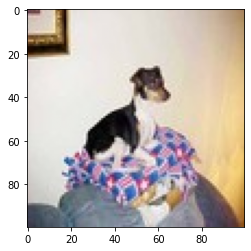

dog


In [32]:
#prediction
n=random.randint(0,len(x_test))
plt.imshow(x_test[0])
plt.show()
if(y_test[n]>0.9):
    print("dog")
else:
    print("cat")